# Color Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
# Settings for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Settings for seaborn
sns.set(rc = {'figure.figsize':(20,8)})

In [3]:
import warnings  # To ignore warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

## 데이터 불러오기

In [4]:
emotions = ['happy', 'sad', 'relaxed', 'angry']

In [5]:
import pickle
import gzip


# load and uncompress.
with gzip.open('colors.pickle','rb') as f:
    total_avg, total_k = pickle.load(f)  # data[0]: total_avg_color_dict, data[1]: total_k_color_dict

In [6]:
print("total_avg_color")
for item in emotions:
    print(item, len(total_avg[item]))

print("\ntotal_k_color")
for item in emotions:
    print(item, len(total_k[item]))

total_avg_color
happy 15292
sad 14896
relaxed 19410
angry 13026

total_k_color
happy 15292
sad 14896
relaxed 19410
angry 13026


## Top 10 colors and their counts in each emotion

### The average colors

In [7]:
from collections import Counter

for emotion in emotions:
    print(emotion)
    for item in Counter(total_avg[emotion]).most_common()[:10]:
        print(item)
    print()  

happy
('darkslategray', 2371)
('dimgray', 2164)
('gray', 1575)
('darkgray', 1199)
('rosybrown', 818)
('silver', 799)
('black', 740)
('darkolivegreen', 641)
('sienna', 392)
('lightslategray', 337)

sad
('darkslategray', 2895)
('dimgray', 2217)
('gray', 1467)
('darkgray', 1092)
('black', 1011)
('darkolivegreen', 703)
('silver', 676)
('rosybrown', 647)
('lightslategray', 340)
('lightgray', 337)

relaxed
('darkslategray', 3182)
('dimgray', 2706)
('gray', 2016)
('darkgray', 1602)
('silver', 1026)
('black', 889)
('rosybrown', 846)
('darkolivegreen', 737)
('lightslategray', 537)
('lightgray', 512)

angry
('darkslategray', 2722)
('dimgray', 1992)
('gray', 1258)
('black', 1071)
('darkgray', 762)
('darkolivegreen', 744)
('rosybrown', 504)
('silver', 493)
('sienna', 347)
('saddlebrown', 273)



#### 첫 3개는 모두 같은 것을 볼 수 있다. (4번째 꺼에서 나머진 다 darkgray이고 angry만 black이긴 하다)

### The K colors

In [8]:
from collections import Counter

for emotion in emotions:
    print(emotion)
    for item in Counter(total_k[emotion]).most_common()[:10]:
        print(item)
    print()  

happy
('black', 3767)
('darkslategray', 1978)
('gainsboro', 663)
('whitesmoke', 510)
('silver', 486)
('lightgray', 474)
('dimgray', 388)
('darkgray', 351)
('white', 340)
('snow', 329)

sad
('black', 4276)
('darkslategray', 2209)
('gainsboro', 648)
('lightgray', 475)
('dimgray', 472)
('whitesmoke', 450)
('silver', 438)
('gray', 387)
('darkgray', 382)
('white', 334)

relaxed
('black', 4049)
('darkslategray', 3056)
('gainsboro', 838)
('silver', 711)
('dimgray', 697)
('lightgray', 651)
('darkgray', 583)
('gray', 516)
('whitesmoke', 514)
('white', 418)

angry
('black', 4601)
('darkslategray', 1858)
('gainsboro', 459)
('silver', 352)
('dimgray', 348)
('whitesmoke', 339)
('lightgray', 324)
('gray', 281)
('snow', 257)
('darkgray', 248)



#### 첫 3개는 모두 같은 것을 볼 수 있다.

## Top 10 colors and their proportions in each emotion

### The average colors

In [9]:
from collections import Counter

for emotion in emotions:
    print(emotion)
    for item in [(color, count / len(total_avg[emotion]) * 100.0) for color, count in Counter(total_avg[emotion]).most_common()[:10]]:
        print(item)
    print()

happy
('darkslategray', 15.504839131572066)
('dimgray', 14.151190164792048)
('gray', 10.299503008108815)
('darkgray', 7.84070102014125)
('rosybrown', 5.349202197227308)
('silver', 5.224954224431075)
('black', 4.839131572063824)
('darkolivegreen', 4.191734240125556)
('sienna', 2.5634318597959718)
('lightslategray', 2.2037666753858227)

sad
('darkslategray', 19.434747583243826)
('dimgray', 14.883190118152523)
('gray', 9.84828141783029)
('darkgray', 7.330827067669173)
('black', 6.787056928034371)
('darkolivegreen', 4.719387755102041)
('silver', 4.53813104189044)
('rosybrown', 4.34344790547798)
('lightslategray', 2.2824919441460794)
('lightgray', 2.2623523093447906)

relaxed
('darkslategray', 16.39361154044307)
('dimgray', 13.94126738794436)
('gray', 10.386398763523957)
('darkgray', 8.253477588871716)
('silver', 5.285935085007728)
('black', 4.5801133436373)
('rosybrown', 4.358578052550232)
('darkolivegreen', 3.797011849562081)
('lightslategray', 2.76661514683153)
('lightgray', 2.6378155589

### The K colors

In [10]:
from collections import Counter

for emotion in emotions:
    print(emotion)
    for item in [(color, count / len(total_k[emotion]) * 100.0) for color, count in Counter(total_k[emotion]).most_common()[:10]]:
        print(item)
    print()

happy
('black', 24.633795448600576)
('darkslategray', 12.934867904786817)
('gainsboro', 4.335600313889616)
('whitesmoke', 3.3350771645304733)
('silver', 3.1781323567878625)
('lightgray', 3.0996599529165576)
('dimgray', 2.5372743918388703)
('darkgray', 2.2953178132356786)
('white', 2.2233847763536487)
('snow', 2.1514517394716193)

sad
('black', 28.705692803437167)
('darkslategray', 14.829484425349088)
('gainsboro', 4.350161117078411)
('lightgray', 3.188775510204082)
('dimgray', 3.168635875402793)
('whitesmoke', 3.0209452201933407)
('silver', 2.9403866809881847)
('gray', 2.598012889366273)
('darkgray', 2.5644468313641244)
('white', 2.242212674543502)

relaxed
('black', 20.860381246780012)
('darkslategray', 15.744461617722823)
('gainsboro', 4.31736218444101)
('silver', 3.66306027820711)
('dimgray', 3.590932509015971)
('lightgray', 3.3539412673879445)
('darkgray', 3.003606388459557)
('gray', 2.6584234930448223)
('whitesmoke', 2.648119526017517)
('white', 2.153529108706852)

angry
('black',

## Visualizations of unshared colors

In [11]:
import webcolors

def show_color(col_list):
    n = len(col_list)  # total numbers of subplots to plot
    
    f, ax = plt.subplots(1, n, figsize=(20,10))
    for i in range(n):
        img = np.empty((150,150,3))  # an empty array to store a color
        img[:,:,0], img[:,:,1], img[:,:,2] = tuple(webcolors.name_to_rgb(col_list[i][0]))  # getting the rgb of a color and storing it in the empty array
        ax[i].imshow(img.astype(np.uint8))  # plotting the color
        ax[i].axis('off')  # hide the axis
    f.tight_layout()
    plt.show()

### Average colors

happy


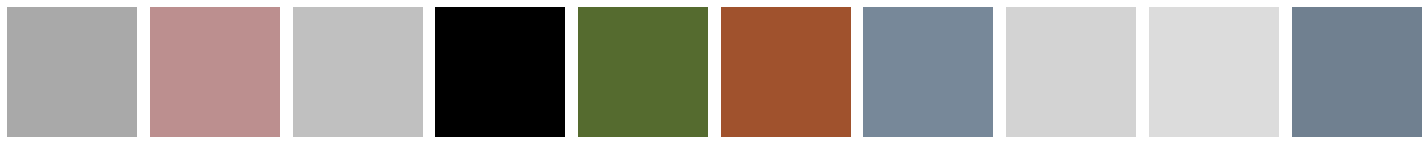

sad


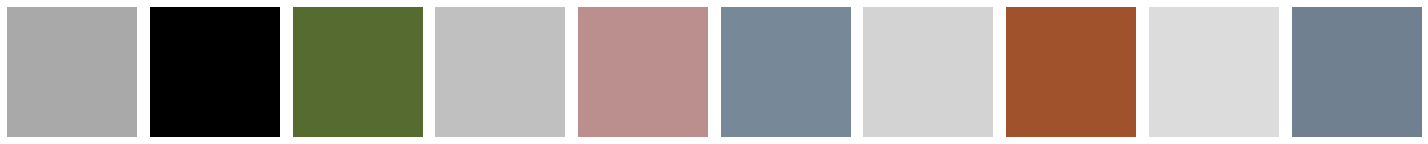

relaxed


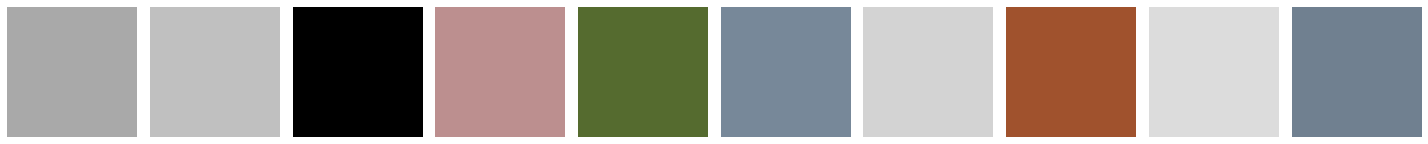

angry


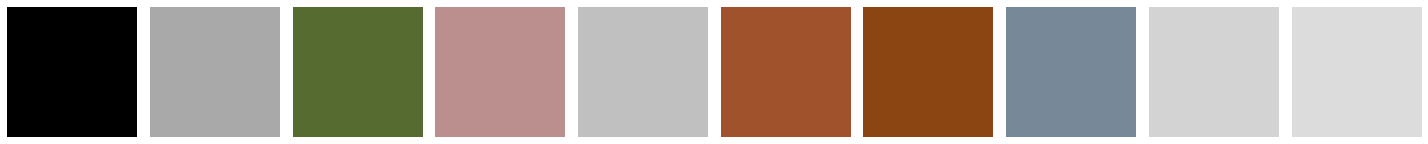

In [12]:
for emotion in emotions:
    print(emotion)
    show_color(Counter(total_avg[emotion]).most_common()[3:13])

### K colors

happy


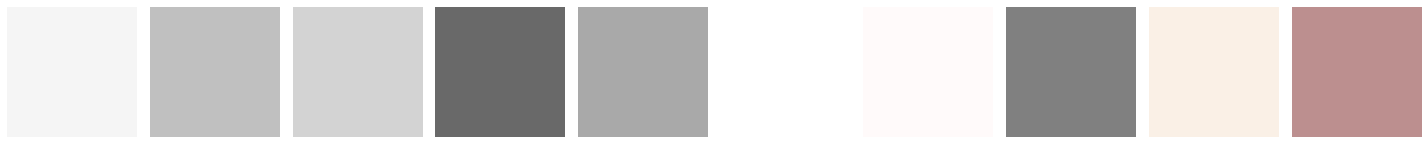

sad


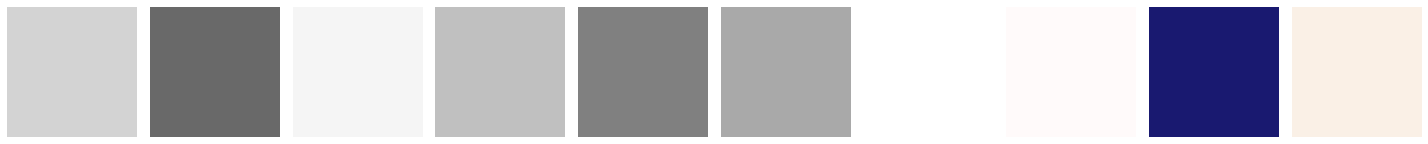

relaxed


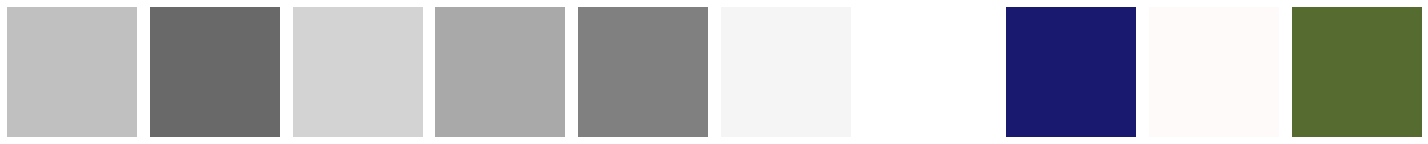

angry


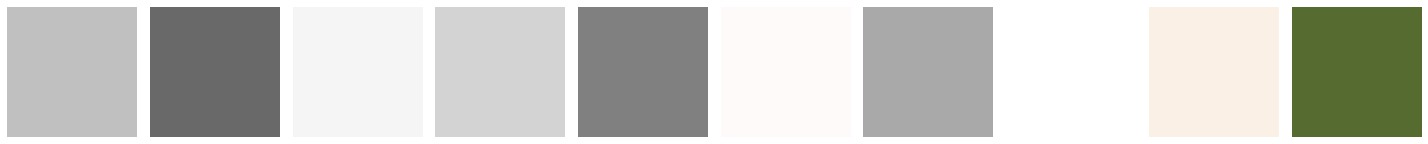

In [13]:
for emotion in emotions:
    print(emotion)
    show_color(Counter(total_k[emotion]).most_common()[3:13])

## Pie Chart of the shared colors

In [14]:
def get_labels_and_ratio(items):   # items has item[0]: label, item[1]: count
    total = 0   # Used to calculate the ratio
    for item in items:
        total += item[1]

    labels = []
    ratio = []
    for item in items:
        labels.append(item[0])
        ratio.append(round((item[1]/total)*100,3))
        
    return labels, ratio

### Average colors

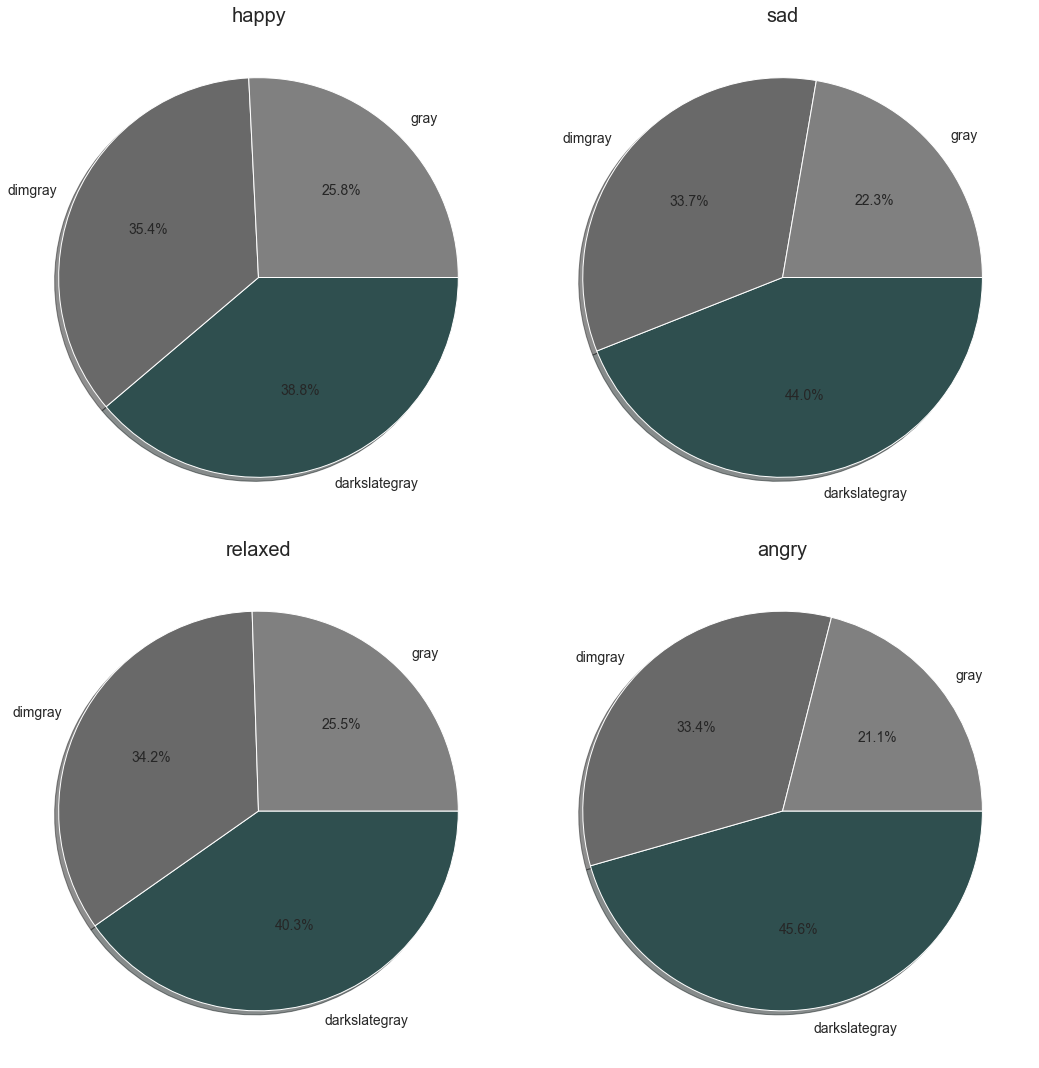

In [15]:
f, ax = plt.subplots(2, 2, figsize=(15,15))
labels, ratio = get_labels_and_ratio(Counter(total_avg[emotions[0]]).most_common()[:3])
ax[0][0].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14})
ax[0][0].set_title(emotions[0],fontsize=20)
labels, ratio = get_labels_and_ratio(Counter(total_avg[emotions[1]]).most_common()[:3])
ax[0][1].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14})
ax[0][1].set_title(emotions[1],fontsize=20)
labels, ratio = get_labels_and_ratio(Counter(total_avg[emotions[2]]).most_common()[:3])
ax[1][0].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14})
ax[1][0].set_title(emotions[2],fontsize=20)
labels, ratio = get_labels_and_ratio(Counter(total_avg[emotions[3]]).most_common()[:3])
ax[1][1].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14})
ax[1][1].set_title(emotions[3],fontsize=20)
f.tight_layout()
plt.show()

### K colors

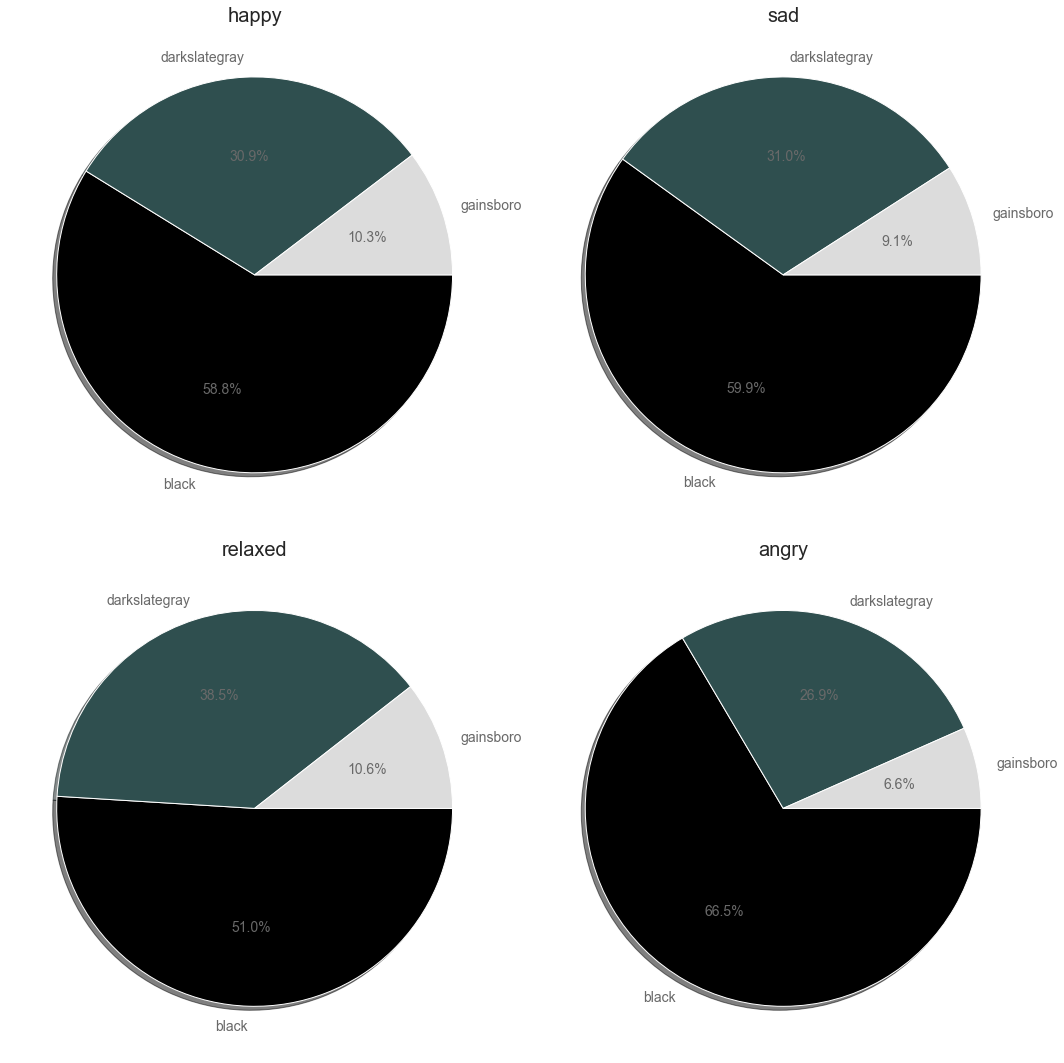

In [16]:
f, ax = plt.subplots(2, 2, figsize=(15,15))
labels, ratio = get_labels_and_ratio(Counter(total_k[emotions[0]]).most_common()[:3])
ax[0][0].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14, 'color':'dimgray'})
ax[0][0].set_title(emotions[0],fontsize=20)
labels, ratio = get_labels_and_ratio(Counter(total_k[emotions[1]]).most_common()[:3])
ax[0][1].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14, 'color':'dimgray'})
ax[0][1].set_title(emotions[1],fontsize=20)
labels, ratio = get_labels_and_ratio(Counter(total_k[emotions[2]]).most_common()[:3])
ax[1][0].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14, 'color':'dimgray'})
ax[1][0].set_title(emotions[2],fontsize=20)
labels, ratio = get_labels_and_ratio(Counter(total_k[emotions[3]]).most_common()[:3])
ax[1][1].pie(ratio, labels=labels, autopct='%.1f%%',  counterclock=False, shadow=True, colors=labels, textprops={'fontsize': 14, 'color':'dimgray'})
ax[1][1].set_title(emotions[3],fontsize=20)
f.tight_layout()
plt.show()

## Shared colors의 분할표 (Contingency table)를 위해 쓰일 데이터프레임

### Average colors

In [17]:
# First make a dataframe in order to use pd.crosstab

df_avg = pd.DataFrame(columns=['emotion','color'])

for emotion in emotions:
    extra = {'emotion': emotion, 'color': list(filter(lambda x: x in  ['darkslategray','dimgray','gray'], total_avg[emotion]))}
    df_avg = df_avg.append(pd.DataFrame(extra))

In [18]:
df_avg.to_csv('avg_colors.csv', encoding='utf-8-sig', index=False)
df_avg

,emotion,color
0,happy,dimgray
1,happy,dimgray
2,happy,gray
3,happy,darkslategray
4,happy,dimgray
...,...,...
5967,angry,darkslategray
5968,angry,darkslategray
5969,angry,darkslategray
5970,angry,darkslategray


### K colors

In [19]:
# First make a dataframe in order to use pd.crosstab

df_k = pd.DataFrame(columns=['emotion','color'])

for emotion in emotions:
    extra = {'emotion': emotion, 'color': list(filter(lambda x: x in  ['black','darkslategray','gainsboro'], total_k[emotion]))}
    df_k = df_k.append(pd.DataFrame(extra))

In [20]:
df_k.to_csv('k_colors.csv', encoding='utf-8-sig', index=False)
df_k

,emotion,color
0,happy,darkslategray
1,happy,black
2,happy,darkslategray
3,happy,darkslategray
4,happy,black
...,...,...
6913,angry,black
6914,angry,black
6915,angry,black
6916,angry,black
